In [1]:
import sys
import os
sys.path.append('../../../measure/amplifiers/gpib_instrument_control')
sys.path.append('../')
sys.path.append('../lmx2594/py')
import wavetek_8502
import hp_5340a
import rf_if_converter
import numpy as np
import scipy.io as sio
import time
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

ps = wavetek_8502.Wavetek8502()
cn = hp_5340a.Hp5340A()

ric = rf_if_converter.RfIfConverter('/dev/ttyUSB0', fosc=280e6, mash_order=3)


Waiting for LMX2594 to boot
Booted successfully
Created LMX object wit fosc 280.0
FPD is 140.000000 MHz


In [47]:
fstart = 750e6;
fstop = 6e9;
fres = 50e6;
fsweep = np.linspace(fstart, fstop, int((fstop-fstart)/fres)+1);
chdivs = np.array([1, 2, 4, 6, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128, 192, 256, 384, 512, 768]);
divF = 7.5e9/chdivs;
divF = divF[np.logical_and(divF>=fstart, divF<=fstop)] 
divF = np.hstack((divF-0.00001, divF))

fsweep = np.sort(np.hstack((divF, fsweep)))



## Initial path measuremetns

In [12]:

highPathPower = []
for f in fsweep:
    ric.setFrequency(f)
    highPathPower.append(ps.readChannelB(f))

ric.setPathLow()
lowPathPower = []
for f in fsweep:
    ric.setFrequency(f)
    lowPathPower.append(ps.readChannelB(f))

Text(0, 0.5, 'Power [dBm]')

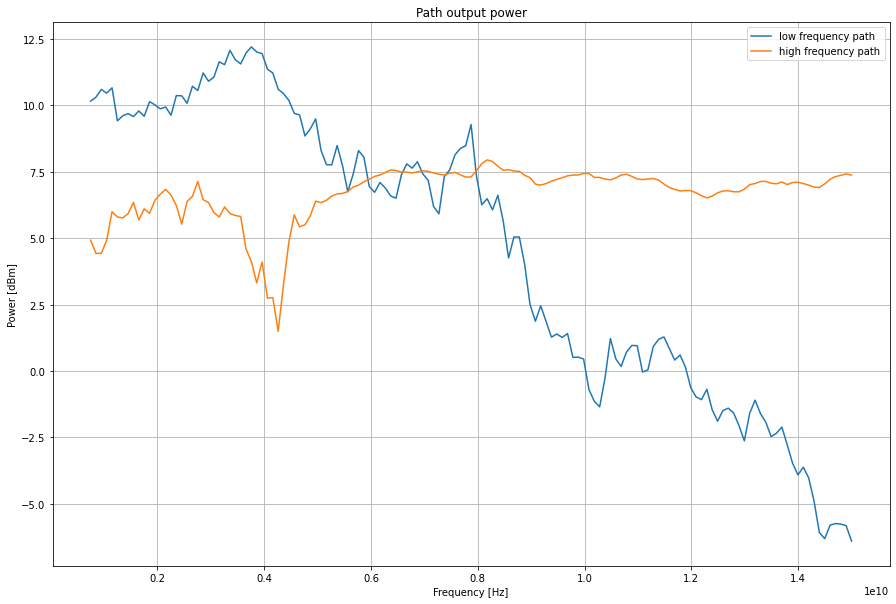

In [11]:
plt.figure()
plt.title('Path output power');
plt.plot(fsweep, lowPathPower, label='low frequency path');
plt.plot(fsweep, highPathPower, label='high frequency path');
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')

Text(0, 0.5, 'Power [dBm]')

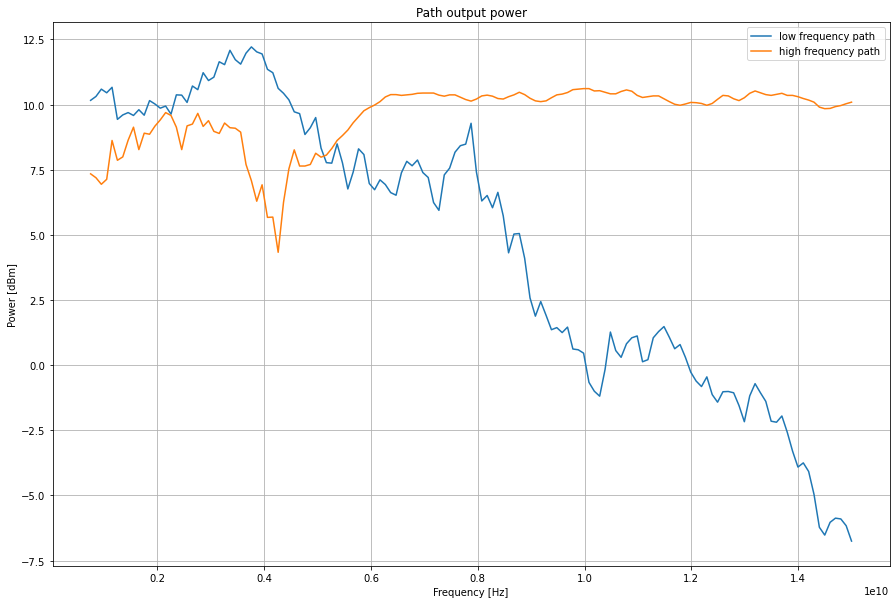

In [13]:
plt.figure()
plt.title('Path output power');
plt.plot(fsweep, lowPathPower, label='low frequency path');
plt.plot(fsweep, highPathPower, label='high frequency path');
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')

## Combined path measurements

In [59]:
powers = []
powerSettings = [0, 1, 2, 3, 4, 8, 16, 32, 48, 63]
powerSettings = range(64)
for p in powerSettings:
    print(p, end=' ')
    power = []
    ric.p.setPower(p)
    for f in fsweep:
        ric.setFrequency(f)
        power.append(ps.readChannelB(f))
    powers.append(power)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 

Text(0, 0.5, 'Power [dBm]')

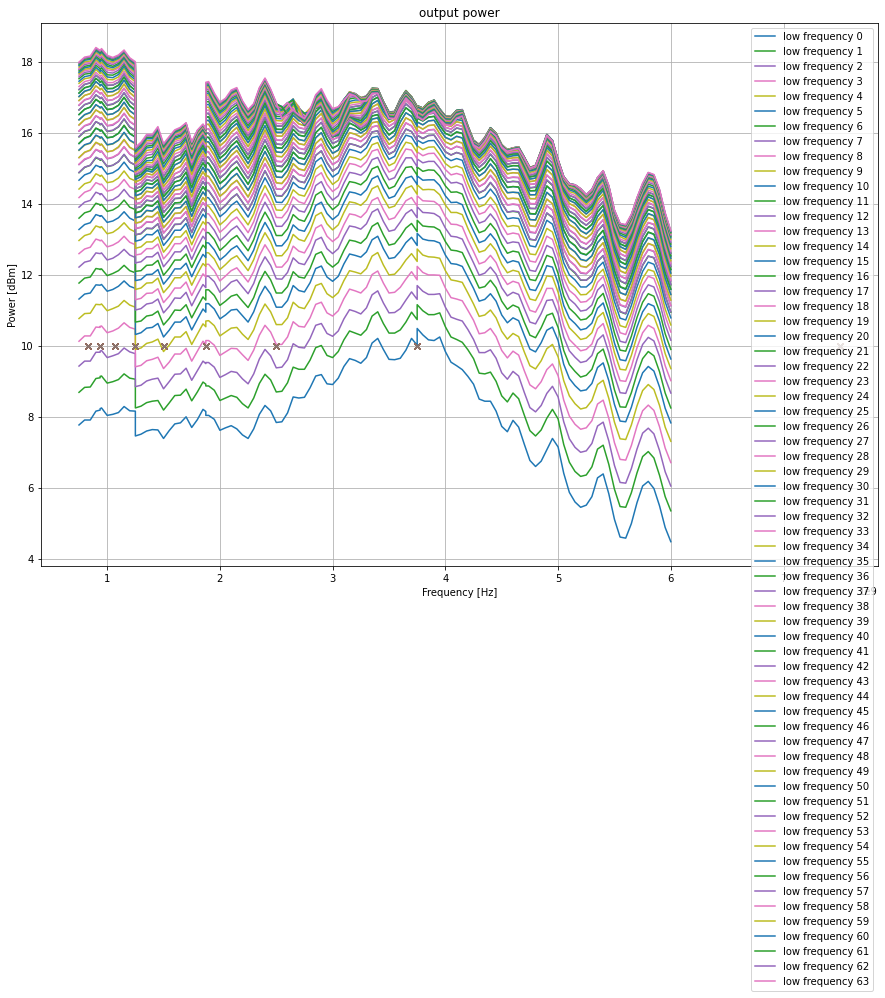

In [60]:
plt.figure()
plt.title('output power');
for i in range(len(powerSettings)):
    plt.plot(fsweep, powers[i], label='low frequency %d'%(powerSettings[i]));
    plt.plot( 7500e6/np.arange(1,10), [10]*9,'x')
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')
#plt.ylim([9, 11])


In [62]:
saveDict = {'fs':fsweep, 'ps':powerSettings, 'po':powers}
sio.savemat('sn0_power_map_0_75_to_6GHz.mat', saveDict)